<a href="https://colab.research.google.com/github/CaduPortifolio/An-lise/blob/main/Profissao_Cientista_de_Dados_M10_support_material_assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [5]:
df = pd.read_csv("previsao_de_renda.csv")

In [6]:
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [11]:
df['data_ref'].unique()
df['data_ref'].value_counts()

,count
data_ref,
2015-01-01,1000
2015-02-01,1000
2015-03-01,1000
2015-04-01,1000
2015-05-01,1000
2015-06-01,1000
2015-07-01,1000
2015-08-01,1000
2015-09-01,1000


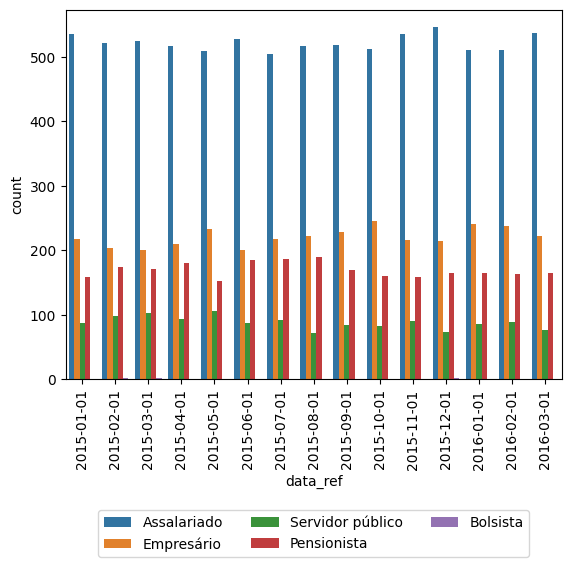

In [15]:
ax = sns.countplot(x='data_ref', hue='tipo_renda', data=df)
plt.xticks(rotation=90)
plt.legend(loc='lower center', bbox_to_anchor=(.5, -.5), ncol = 3)

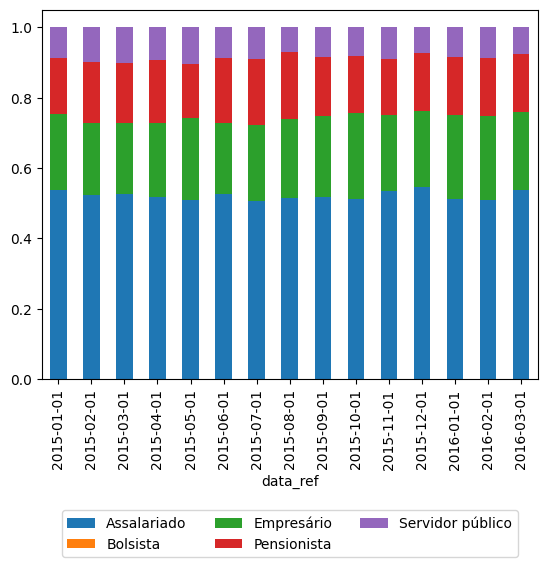

In [23]:
tab_freq = pd.crosstab(df['data_ref'],df['tipo_renda'])
tab = tab_freq.div(tab_freq.sum(axis=1), axis=0)


ax = tab.plot.bar(stacked = True)


ticks = ax.set_xticks(list(range(df['data_ref'].nunique())))


plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)

In [24]:
tab

tipo_renda,Assalariado,Bolsista,Empresário,Pensionista,Servidor público
data_ref,,,,,
2015-01-01,0.536,0.000,0.218,0.159,0.087
2015-02-01,0.522,0.002,0.204,0.174,0.098
2015-03-01,0.525,0.001,0.201,0.171,0.102
2015-04-01,0.517,0.000,0.210,0.180,0.093
2015-05-01,0.509,0.000,0.233,0.152,0.106
2015-06-01,0.527,0.000,0.201,0.185,0.087
2015-07-01,0.505,0.000,0.217,0.187,0.091
2015-08-01,0.516,0.000,0.222,0.190,0.072
2015-09-01,0.518,0.000,0.229,0.169,0.084


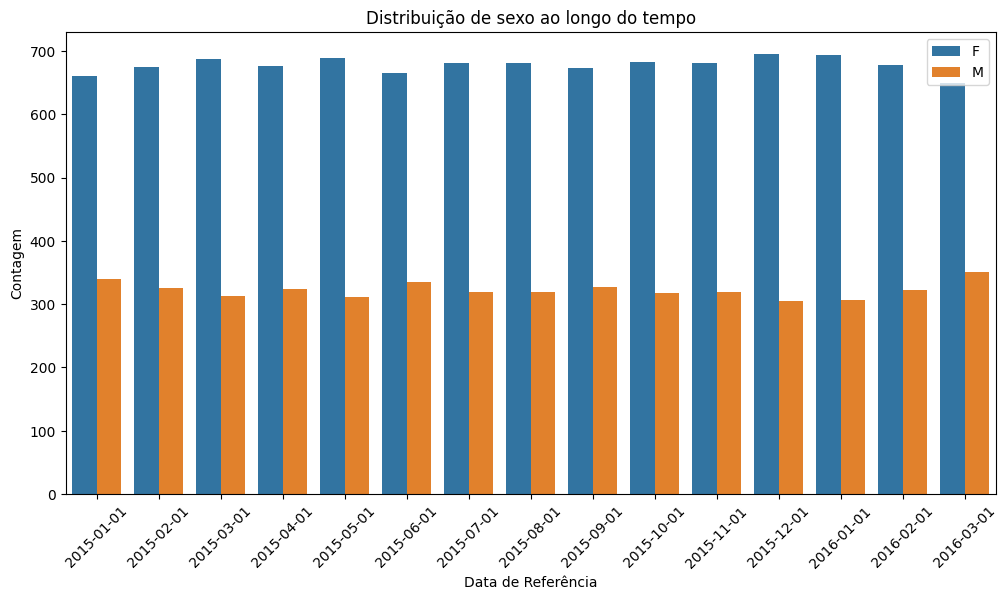

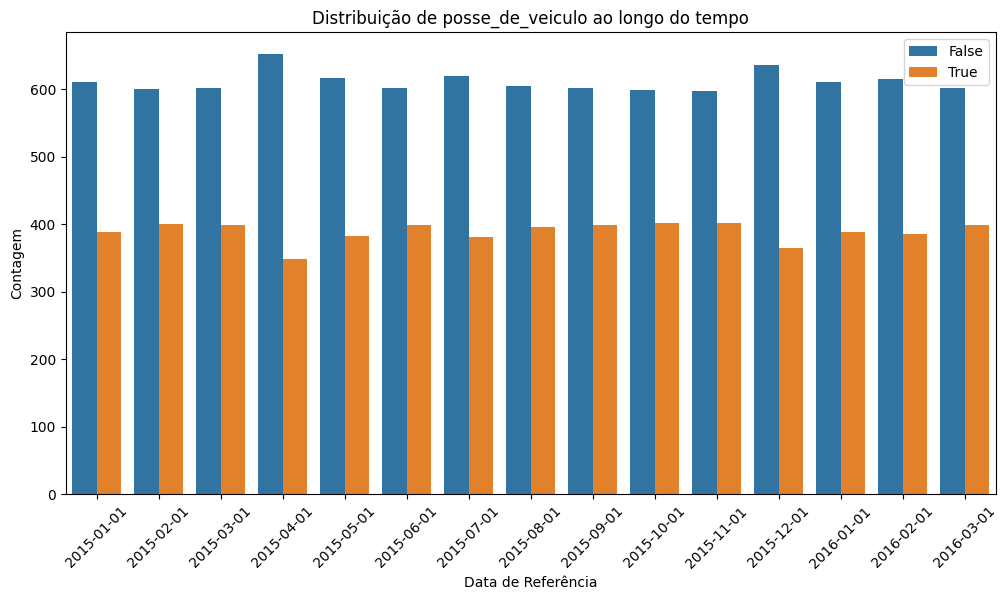

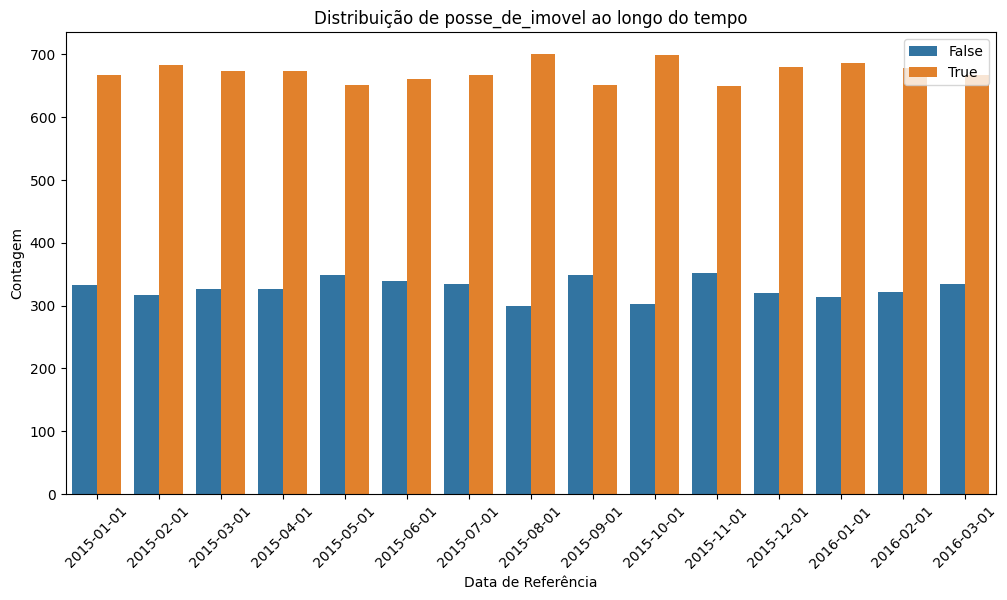

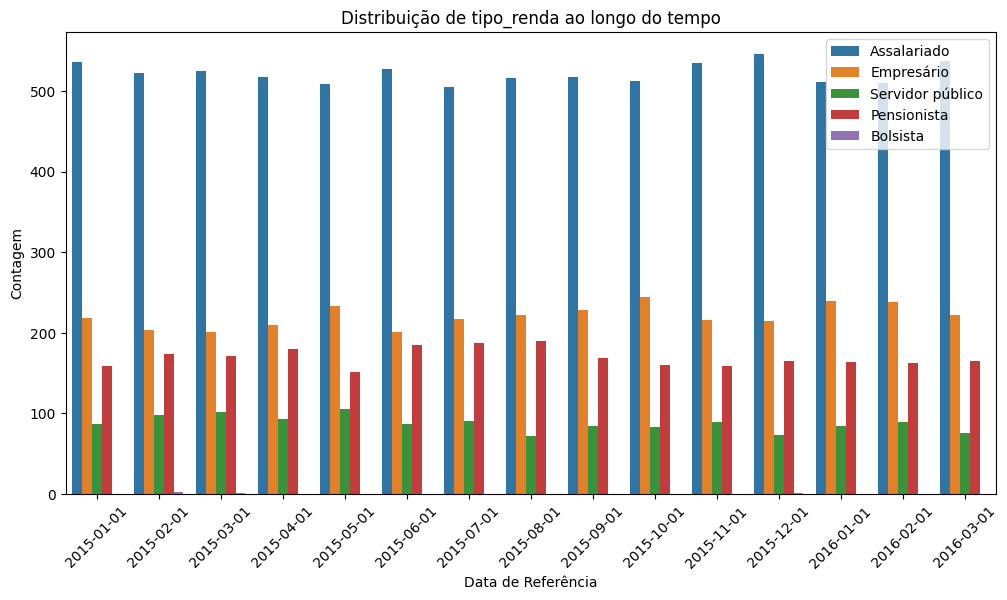

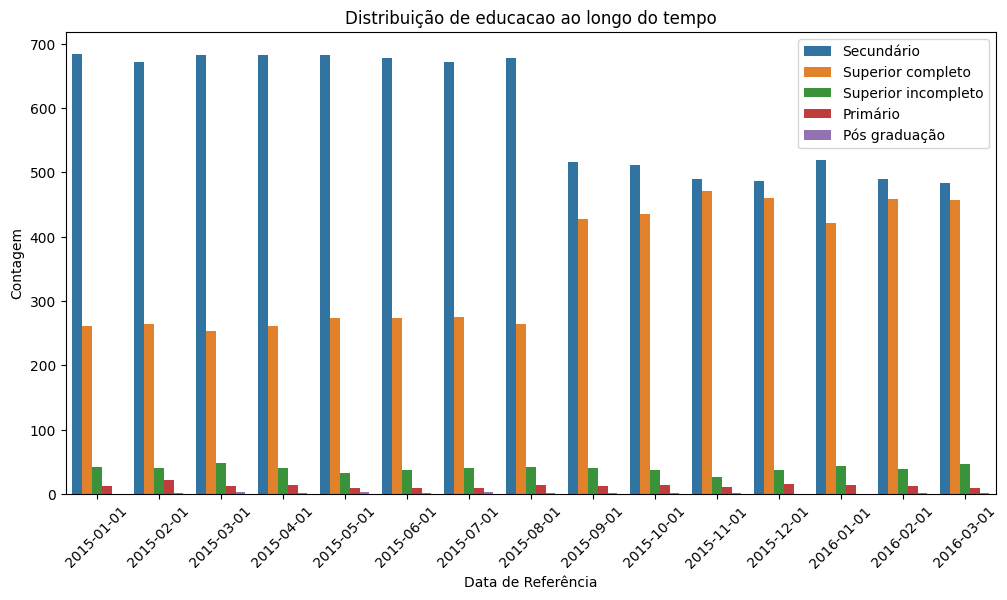

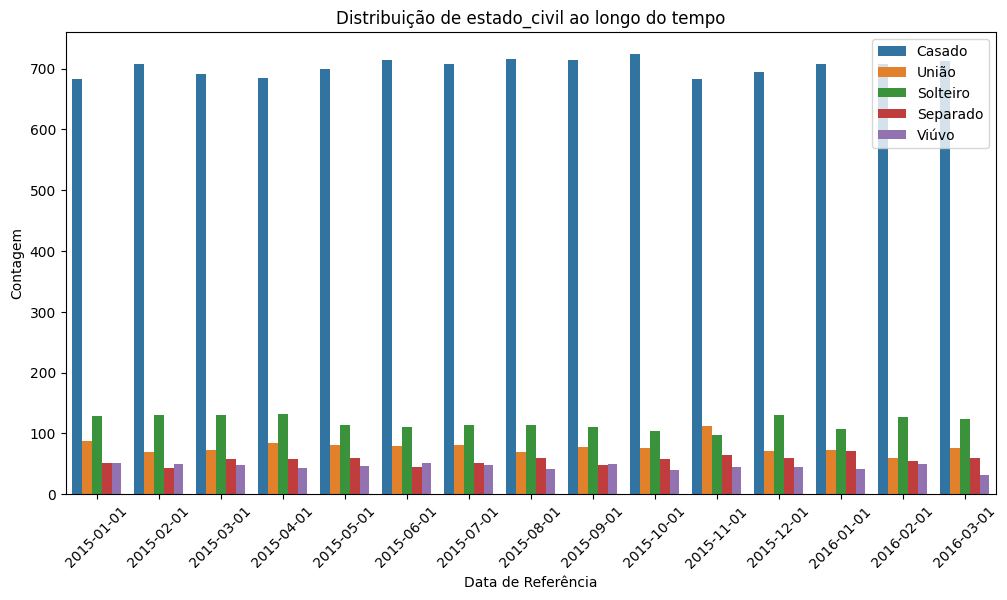

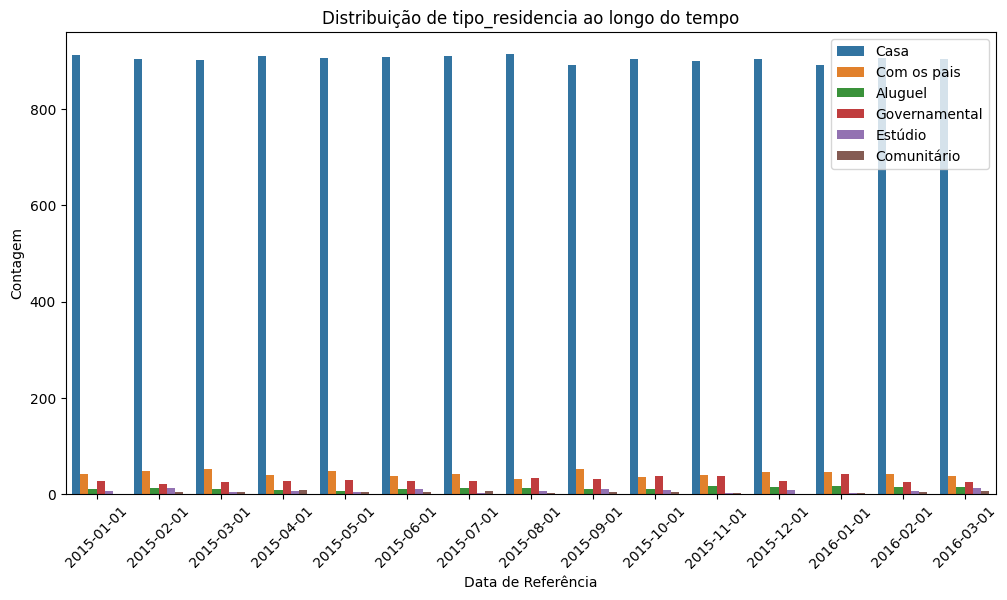

In [25]:
# Convertendo a coluna "data_ref" para o tipo datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Selecionando as variáveis qualitativas
qualitative_vars = ["sexo", "posse_de_veiculo", "posse_de_imovel", "tipo_renda", "educacao", "estado_civil", "tipo_residencia"]

# Plotando os gráficos de barras para cada variável qualitativa ao longo do tempo
for var in qualitative_vars:
    plt.figure(figsize=(12, 6))
    plt.title(f"Distribuição de {var} ao longo do tempo")
    sns.countplot(x='data_ref', hue=var, data=df)
    plt.xticks(rotation=45)
    plt.xlabel("Data de Referência")
    plt.ylabel("Contagem")
    plt.legend(loc='upper right')
    plt.show()

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

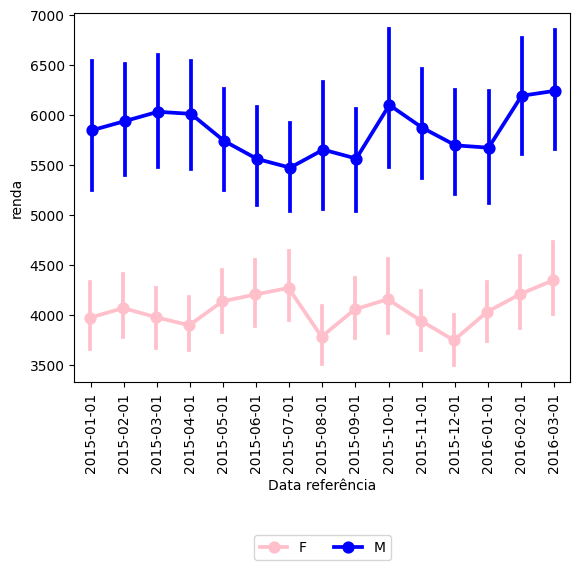

In [54]:
ax = sns.pointplot(
    x='data_ref',
    y='renda',
    hue='sexo',
    data=df,
    dodge=True,
    errorbar=('ci', 95),
    palette={'M': 'blue', 'F': 'pink'}
)
plt.xticks(rotation=90)
plt.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.50),ncol = 3)
plt.xlabel('Data referência')
plt.show()

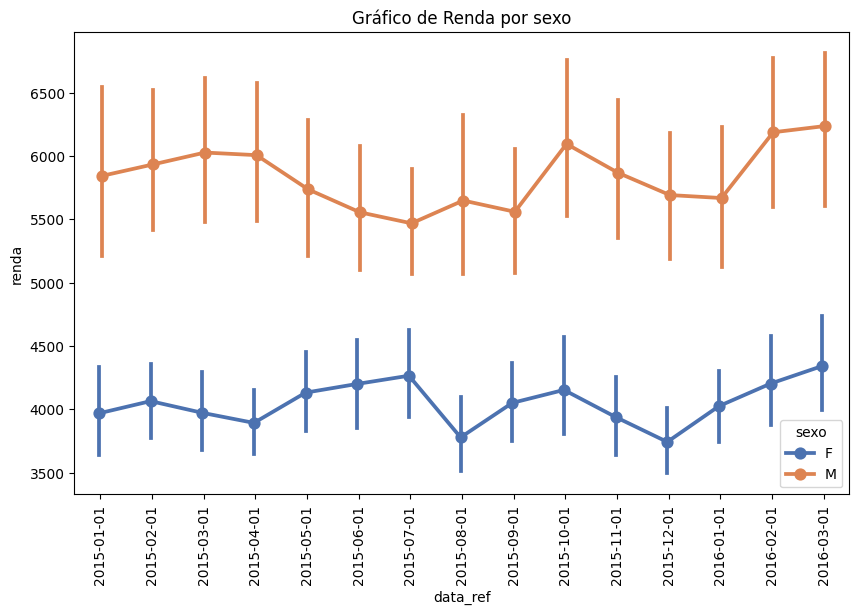

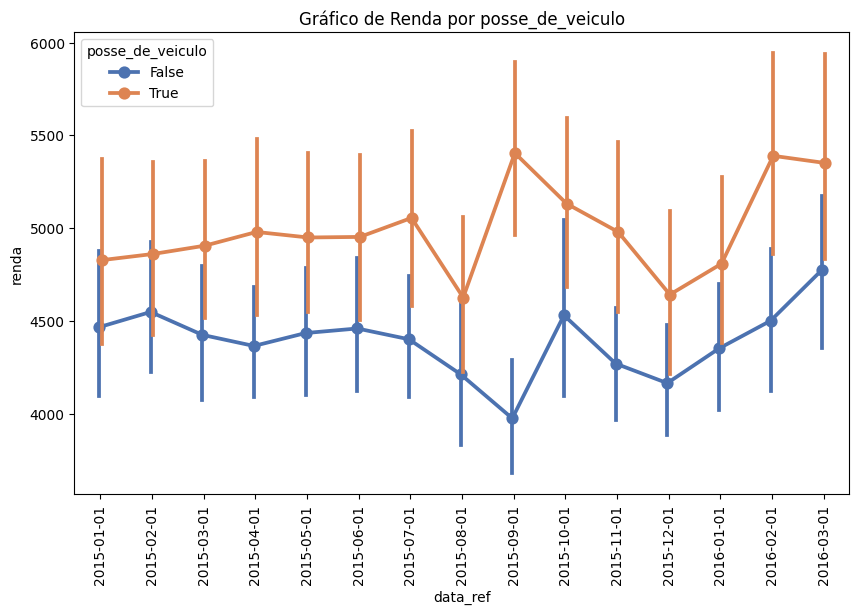

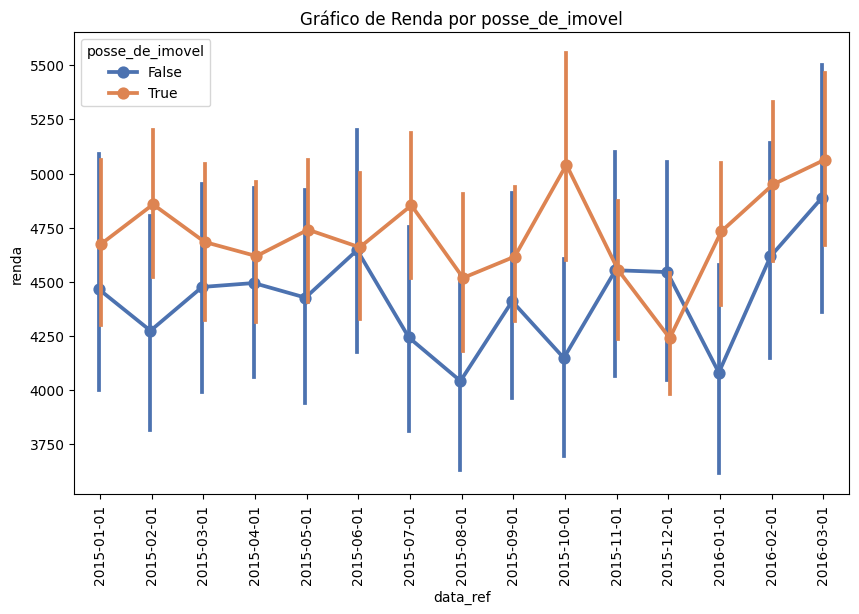

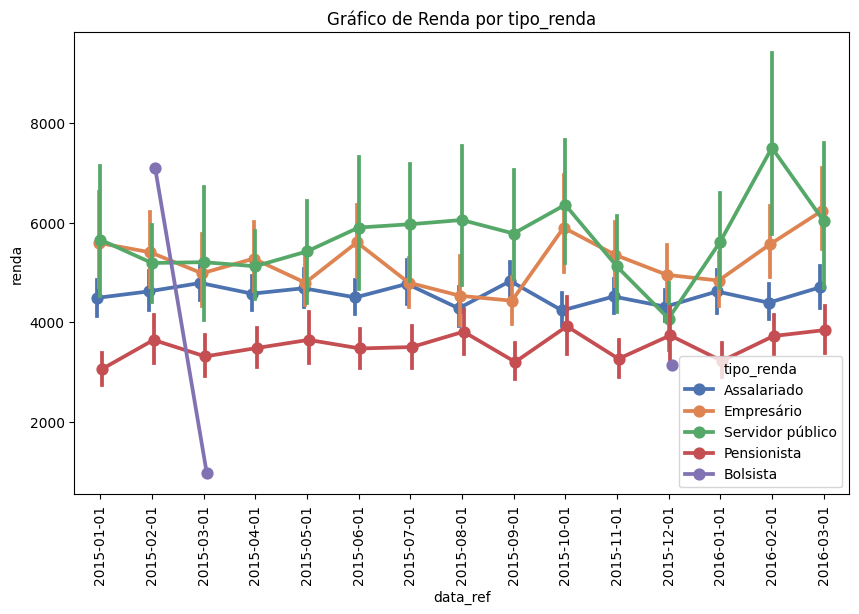

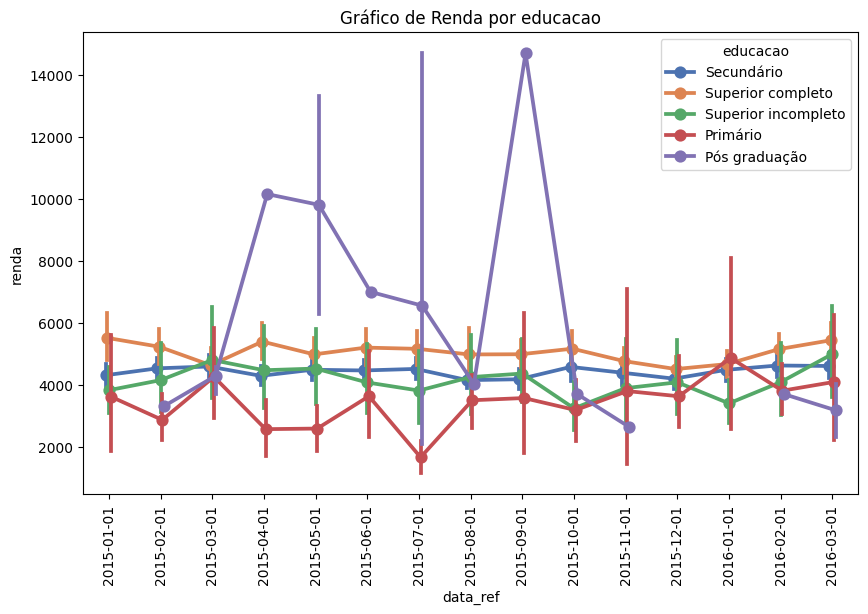

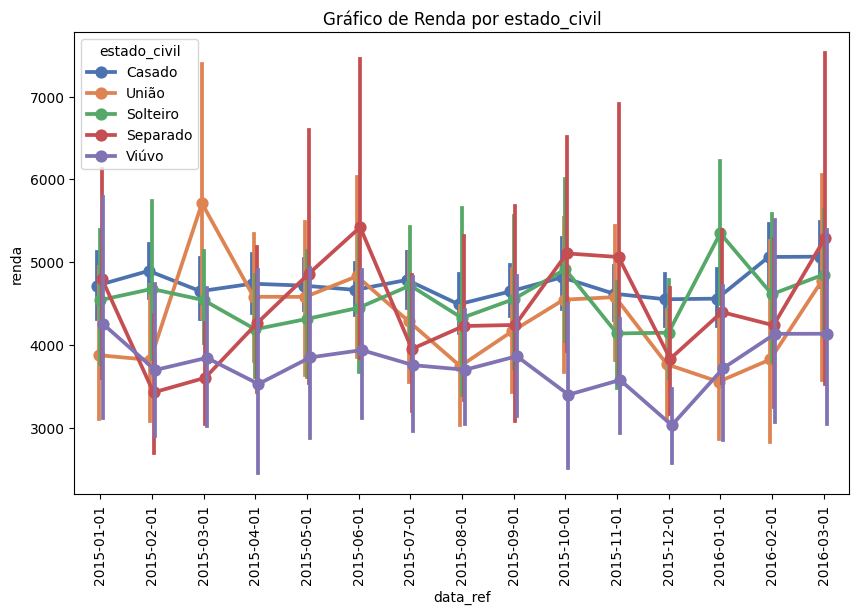

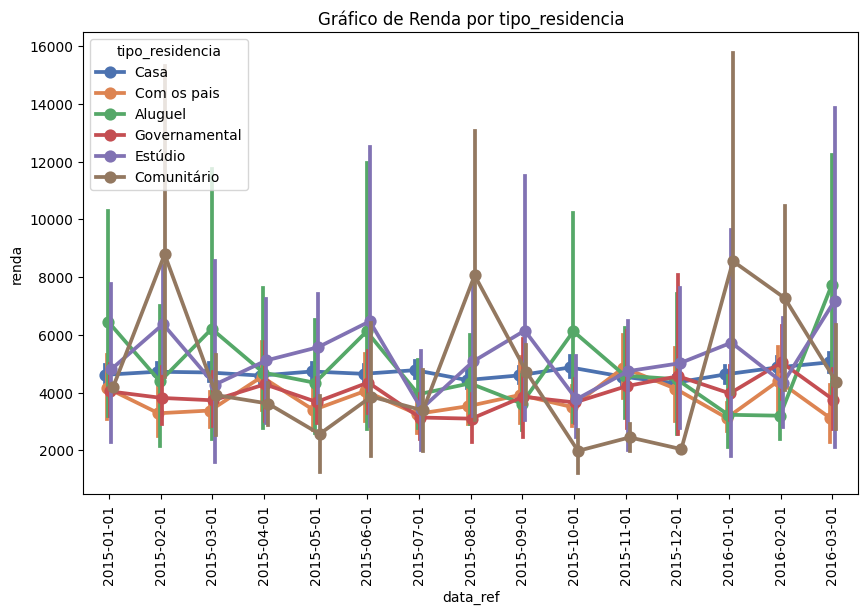

In [56]:
# Loop para criar gráficos
for var in qualitative_vars:
    plt.figure(figsize=(10, 6))
    ax = sns.pointplot(
        x='data_ref',
        y='renda',
        hue=var,
        data=df,
        dodge=True,
        errorbar=('ci', 95),
        palette='deep'  # Você pode escolher outra paleta se preferir
    )
    plt.xticks(rotation= 90)
    ax.set_title(f'Gráfico de Renda por {var}')
    plt.legend(title=var)
    plt.show()

Resposta.


> Analisando os gráfico e com base na minha última entrega percebo que minha opinião se mantém inclusive acredito que me antecipei ao analisar mais dados que o pedido anteriormente. A única variável que surtil efeito e deveria ser incluida após essa nova análise seria a sexo ao longo do tempo, pois percebo que ao longo do tempo os individuos do sexo masculino mantiveram sua renda superior ao do sexo feminino ao longo do tempo.

De forma complementar deixo abaixo minha análise da tarefa anterior para facilitar o entendimento ao meu argumento:

Comparando renda x imóveis e renda x veiculos, percebemos que pessoas com maior renda tende a adquirir mais bens que naturalmente se explica pela sua capacidade de compra através de sua renda, no entanto, achei melhor cruzar as variaveis solicitadas com outras para tentar encontra melhores insights. Percebi que pessoas com bens e filhos tende a ter renda maior e acredito que isso ocorre pensando nos filhos/família. O nível de escolarida tem impacto leve em relação as variaveis solicitadas, porém vejo que a renda em nenhum dos casos passa de 10k, é possível que as pessoas com bens estejam vivendo com menos, pois parte da renda pode está comprometida com financiamentos.

